## Assignment 3

For this exercise, you will use logistic regression and neural networks to recognize handwritten digits (from 0 to 9).

Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. 

This exercise will show you how the methods you’ve learned can be used for this classification task. In the first part of the exercise, you will extend your previous implementation of logistic regression and apply it to one-vs-all classification.

In [21]:
import numpy as np
import pandas as pd
import random

from scipy.io import loadmat
import scipy.optimize as opt

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ex3data1_mat = loadmat('ex3data1.mat')
ex3data1 = pd.DataFrame(np.hstack((ex3data1_mat['X'], ex3data1_mat['y'])))
ex3data1.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0


In [3]:
X = ex3data1_mat['X']
y = ex3data1_mat['y']

In [4]:
X.shape, y.shape

((5000, 400), (5000, 1))

The value on the picture is [10]


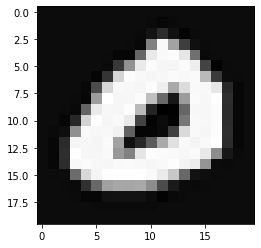

In [5]:
# visualizing one number (one row of X)

# without order='F' the image will appear sideways
random_num = random.randint(0, X.shape[0])

plt.imshow(X[random_num].reshape((20,20), order='F'), cmap='gray')
print("The value on the picture is {}".format(y[random_num]))

In [6]:
# select 100 random rows from X
def return_rows(X, n):
    rand_rows_ind = random.sample(range(0, len(X)), n)
    rand_rows = []
    
    for i in rand_rows_ind:
        rand_rows.append(X[i].reshape((20,20), order='F'))
        
    return rand_rows

In [7]:
rand_rows = np.array(return_rows(X, 100))
rand_rows.shape

(100, 20, 20)

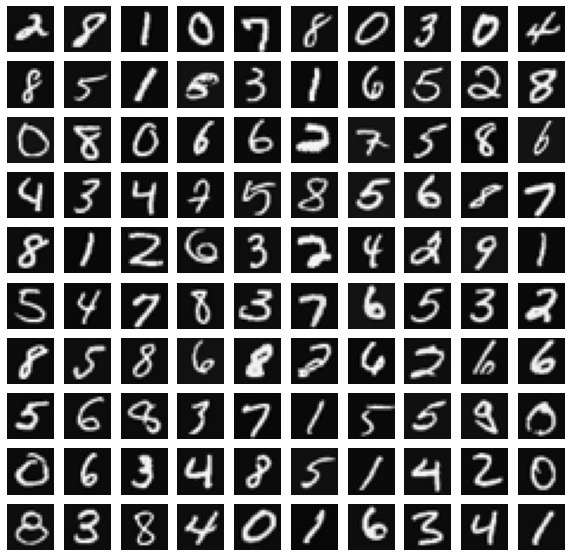

In [8]:
# generate a 10*10 grid of images
_, ax = plt.subplots(10,10,figsize=(10,10))

# add each number from rand_rows to the grid
count = 0
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(rand_rows[count], cmap='gray')          
        ax[i,j].axis('off')  
        count += 1

In [9]:
# Preparing data for logistic regression
# Add a column of 1's to X 
# m = len(y)
# X = np.hstack((np.ones((m,1)), X))

# # Extract new X's dimentions
# m, n = X.shape

# Lambda = 0.1
# num_labels = 10
# theta = np.zeros((num_labels, n))

In [10]:
# print("X has dimentions {}".format(X.shape))

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [29]:
# Cost function
def computeCost_reg(thetar, Xr, yr, Lambda):
    h = sigmoid(np.dot(Xr,thetar))
    if_pass = np.multiply(yr, np.log(h)) # the signes of yr and 1-yr are changed because they
    if_fail = np.multiply((1-yr), np.log(1-h)) # are not compatible with opt.fmin_cg
    
    reg_term = (Lambda/(2*mt)) * np.sum(thetar[1:]**2)
    
    J = -1/mt * np.sum(if_pass + if_fail) + reg_term 
    
    return J

In [27]:
# compute gradients
def computeGradients_reg(thetar, Xr, yr, Lambda):
    h = sigmoid(np.dot(Xr,thetar))
    grad = np.zeros([mt,1])
    
    grad = (1/mt) * np.dot(Xr.T, (h - yr))
    grad[1:] = grad[1:] + (Lambda / mt) * thetar[1:]
    
    return grad

In [14]:
# Testing our cost function

In [15]:
# function that creates a test data set
def mod_Xy(Xt):
    k,l = Xt.shape
    
    count = 1
    for i in range(0,k):
        for j in range(0,l):
            Xt[i][j] = count/10
            count += 1
            
    y = np.zeros((l,1))
    for i in range(0,l):
        if i%2 == 0:
            y[i] = 1
    
    return np.hstack((np.ones((l,1)),Xt.T)), y

In [16]:
# setting up testing data
Xt = np.ones((3,5))
Xt, yt = mod_Xy(Xt)

thetat = np.array((-2, -1, 1, 2)).reshape(4,1)
mt = len(yt)

#Xt, yt, thetat

In [28]:
J = computeCost_reg(thetat, Xt, yt, 3)
grads = computeGradients_reg(thetat, Xt, yt, 3)

J, grads

(2.534819396109744,
 array([[ 0.14656137],
        [-0.54855841],
        [ 0.72472227],
        [ 1.39800296]]))

In [18]:
# Preparing data for logistic regression
# Add a column of 1's to X 
m = len(y)
X = np.hstack((np.ones((m,1)), X))

# Extract new X's dimentions
m, n = X.shape

Lambda = 0.1
num_labels = 10
theta = np.zeros((num_labels, n))

In [19]:
print("X has dimentions {}".format(X.shape))

X has dimentions (5000, 401)


In [31]:
for i in range(num_labels):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f=computeCost_reg,x0=theta[i], fprime=computeGradients_reg,
                           args=(X, (y==digit_class).flatten(), Lambda), maxiter=50)

         Current function value: 8.567911
         Iterations: 50
         Function evaluations: 90
         Gradient evaluations: 90
         Current function value: 13.114927
         Iterations: 50
         Function evaluations: 95
         Gradient evaluations: 95
         Current function value: 50.854395
         Iterations: 50
         Function evaluations: 97
         Gradient evaluations: 97
         Current function value: 57.673569
         Iterations: 50
         Function evaluations: 94
         Gradient evaluations: 94
         Current function value: 33.115222
         Iterations: 50
         Function evaluations: 92
         Gradient evaluations: 92
         Current function value: 54.766317
         Iterations: 50
         Function evaluations: 99
         Gradient evaluations: 99
         Current function value: 18.256403
         Iterations: 50
         Function evaluations: 101
         Gradient evaluations: 101
         Current function value: 30.670430
         It

In [33]:
pred = np.argmax(np.dot(X,theta.T), axis = 1)
pred = [e if e else 10 for e in pred]
np.mean(pred == y.flatten()) * 100

96.36